In [1]:
%matplotlib inline

In [2]:
import warnings 
warnings.filterwarnings('ignore')
from mocpy import MOC

In [3]:
from astroquery.vizier import Vizier

viz = Vizier(columns=['*', '_RAJ2000', '_DEJ2000'])
viz.ROW_LIMIT = -1
table = viz.get_catalogs('I/293/npm2cros')[0]

In [4]:
galex = MOC.from_fits('demo-data/P-GALEXGR6-AIS-FUV.fits')

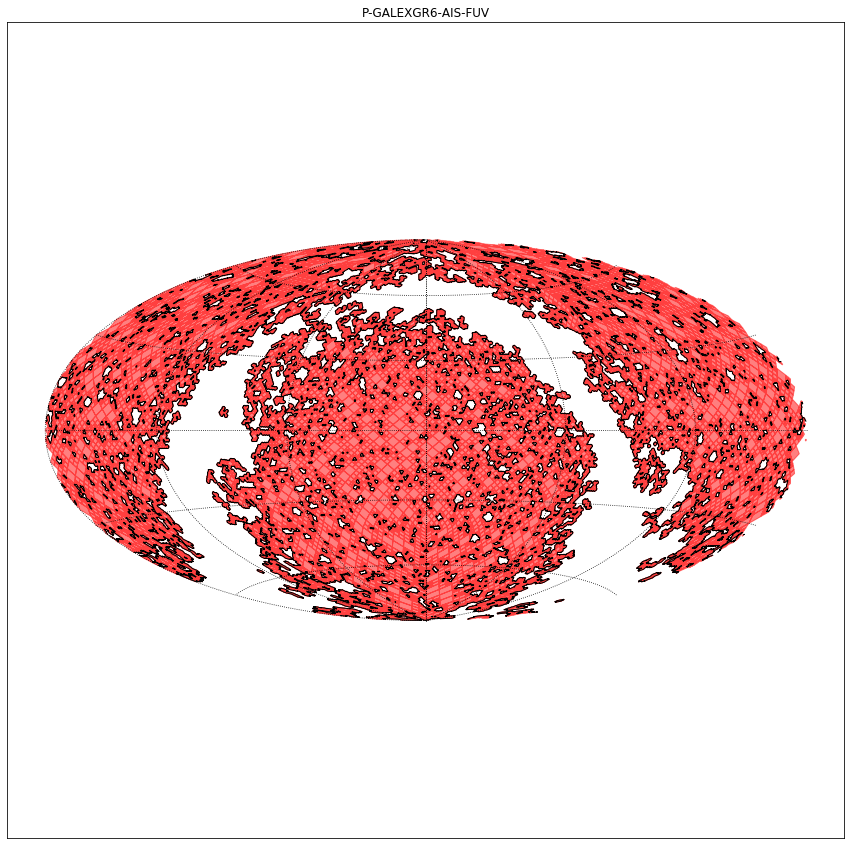

In [5]:
from mocpy.spatial.utils import make_wcs

# A function creating all the matplotlib context for plotting a MOC with its perimeter
def plot(moc, wcs, title=''):
    import matplotlib.pyplot as plt
    fig, ax = plt.subplots(1, 1, figsize=(15, 15), subplot_kw={"projection": wcs})
    moc.fill(ax=ax, wcs=wcs, alpha=0.5, fill=True, color='r')
    moc.border(ax=ax, wcs=wcs, color='black')

    plt.axis('equal')
    plt.xlabel('ra')
    plt.ylabel('dec')
    if title:
        plt.title(title)
    plt.grid(color="black", linestyle="dotted")
    plt.show()
    
wcs_icrs = make_wcs(crpix=[0, 0], crval=[0, 0], cdelt=[-5, 5], ctype=["RA---AIT", "DEC--AIT"])
plot(moc=galex, wcs=wcs_icrs, title='P-GALEXGR6-AIS-FUV')

In [6]:
print(table)

_RAJ2000 _DEJ2000   NPM2   KLA  RAJ2000    DEJ2000   ID  IQ  IN r_Star  mag  tyc
  deg      deg                  "h:m:s"    "d:m:s"                      mag     
-------- -------- -------- --- ---------- --------- --- --- --- ------ ----- ---
339.6383  83.1667 +83.0016 HPM 22 38 33.2 +83 10 00   1   0   0    811 14.20    
339.6383  83.1667 +83.0016 HPM 22 38 33.2 +83 10 00   1   0   0    813 14.20    
349.5308  83.0106 +83.0022 VAR 23 18 07.4 +83 00 38   0   0   0    843    --   T
349.5308  83.0106 +83.0022 SRA 23 18 07.4 +83 00 38   0   0   0      1  9.60   T
323.8542  82.9972 +82.0030 UBV 21 35 25.0 +82 59 50   0   0   0      5 10.08   T
332.1079  82.7475 +82.0055  WD 22 08 25.9 +82 44 51   0   0   0   1012 16.00    
332.9337  82.6078 +82.0059 HPM 22 11 44.1 +82 36 28   1   0   0    811 16.70    
335.0887  82.9708 +82.0065 HPM 22 20 21.3 +82 58 15   1   0   0    811 11.00   T
337.1192  82.7639 +82.0074 UBV 22 28 28.6 +82 45 50   0   0   0      5 10.42   T
337.2746  82.6622 +82.0075 H

In [9]:
from astropy import units as u
indexes = galex.contains(table['_RAJ2000'].T * u.deg, table['_DEJ2000'].T * u.deg)
filtered_table = table[indexes]
print(filtered_table)

_RAJ2000 _DEJ2000   NPM2   KLA  RAJ2000    DEJ2000   ID  IQ  IN r_Star  mag  tyc
  deg      deg                  "h:m:s"    "d:m:s"                      mag     
-------- -------- -------- --- ---------- --------- --- --- --- ------ ----- ---
339.6383  83.1667 +83.0016 HPM 22 38 33.2 +83 10 00   1   0   0    811 14.20    
339.6383  83.1667 +83.0016 HPM 22 38 33.2 +83 10 00   1   0   0    813 14.20    
349.5308  83.0106 +83.0022 VAR 23 18 07.4 +83 00 38   0   0   0    843    --   T
349.5308  83.0106 +83.0022 SRA 23 18 07.4 +83 00 38   0   0   0      1  9.60   T
323.8542  82.9972 +82.0030 UBV 21 35 25.0 +82 59 50   0   0   0      5 10.08   T
335.0887  82.9708 +82.0065 HPM 22 20 21.3 +82 58 15   1   0   0    811 11.00   T
337.1192  82.7639 +82.0074 UBV 22 28 28.6 +82 45 50   0   0   0      5 10.42   T
337.2746  82.6622 +82.0075 HPM 22 29 05.9 +82 39 44   1   1   0    811 17.40    
338.3379  82.3692 +82.0079 HPM 22 33 21.1 +82 22 09   1   0   0    811 16.20    
328.9600  81.3192 +81.0032 H

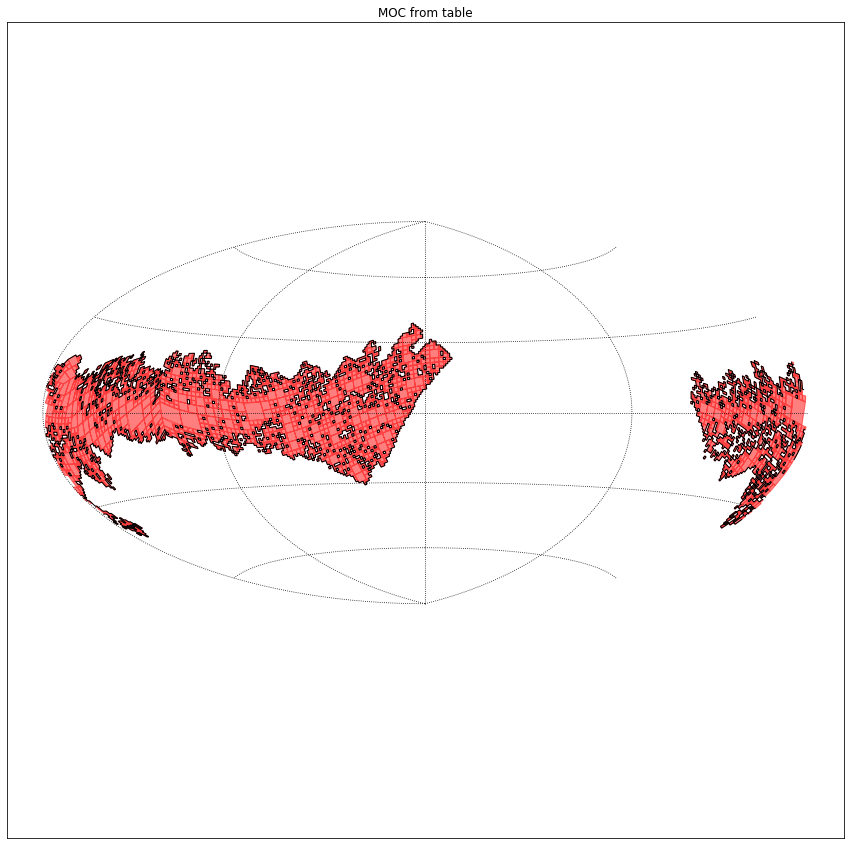

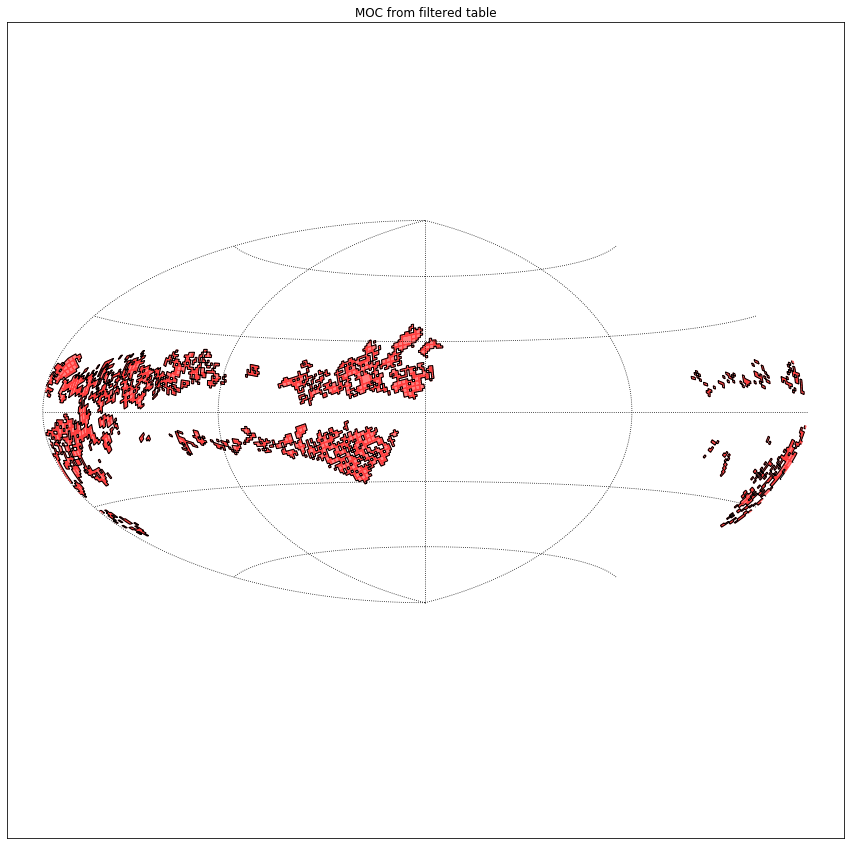

In [10]:
from astropy.coordinates import Galactic

m1 = MOC.from_lonlat(table['_RAJ2000'].T * u.deg, table['_DEJ2000'].T * u.deg, 6)
m2 = MOC.from_lonlat(filtered_table['_RAJ2000'].T * u.deg, filtered_table['_DEJ2000'].T * u.deg, 6)

wcs_galactic = make_wcs(crpix=[0, 0], crval=[0, 0], cdelt=[-5, 5], ctype=["GLON-AIT", "GLAT-AIT"])
plot(moc=m1, wcs=wcs_galactic, title="MOC from table")
plot(moc=m2, wcs=wcs_galactic, title="MOC from filtered table")